# DATA CHALLENGE DEMO
# Winsconsin Cancer dataset
**By Dieudonne Ouedraogo, Friday 02/15/2019**

**1. Import all the necessary libraries**

In [68]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
% pylab inline

UsageError: Line magic function `%` not found.


**2. read the data into the computing environment**

In [69]:
cancer_data=pd.read_csv("breast-cancer-wisconsin.txt")

**3. glance into the data**

In [70]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15855 entries, 0 to 15854
Data columns (total 12 columns):
Index                          15855 non-null int64
ID                             15855 non-null int64
Clump Thickness                15855 non-null int64
Uniformity of Cell Size        15827 non-null object
Uniformity of Cell Shape       15827 non-null object
Marginal Adhesion              15827 non-null object
Single Epithelial Cell Size    15827 non-null object
Bare Nuclei                    15827 non-null object
Bland Chromatin                15827 non-null object
Normal Nucleoli                15827 non-null object
Mitoses                        15827 non-null object
Class                          15827 non-null object
dtypes: int64(3), object(9)
memory usage: 1.5+ MB


In [71]:
cancer_data.head()

,Index,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,0,1241035,7,8,3,7,4,5,7,8,2,4
1,1,1107684,6,10,5,5,4,10,6,10,1,4
2,2,691628,8,6,4,10,10,1,3,5,1,4
3,3,1226612,7,5,6,3,3,8,7,4,1,4
4,4,1142706,5,10,10,10,6,10,6,5,2,4


**4. We don't need Index neither ID, let's drop them**

In [72]:
# drop user id  AND Index column
cancer_data.drop(["Index","ID"], axis=1, inplace=True)

**5. Let's check for duplicates in the data and removing them if any**

In [74]:
# removing duplicates
sum(cancer_data.duplicated())

15350

In [75]:
cancer_data.drop_duplicates(inplace=True)

**6. The data has  many "No idea", we will remove them and replace by nothing**

In [76]:
cancer_data = cancer_data.replace("No idea","")

In [142]:
#cancer_data

In [143]:
#cancer_data.isnull().sum(axis=1).tolist()

In [81]:
cancer_data.tail()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
15717,10,1,1,1,2,10,5,4,1,4
15720,4,1,2,1,2,1,1,1,1,2
15742,5,8,8,10,5,10,8,10,3,4
15756,6,8,8,1,3,4,3,7,1,2
15779,10,4,6,1,2,10,5,3,1,4


In [82]:
cancer_data.dtypes

Clump Thickness                 int64
Uniformity of Cell Size        object
Uniformity of Cell Shape       object
Marginal Adhesion              object
Single Epithelial Cell Size    object
Bare Nuclei                    object
Bland Chromatin                object
Normal Nucleoli                object
Mitoses                        object
Class                          object
dtype: object

**7. there are more issues to resolve from the data # and ? are in the data**

In [83]:
cancer_data = cancer_data.replace("#","")

In [86]:
cancer_data = cancer_data.replace("?","")

**8. convert the data into numeric**

In [87]:
cancer_data = cancer_data.apply(pd.to_numeric)

In [88]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 505 entries, 0 to 15779
Data columns (total 10 columns):
Clump Thickness                505 non-null int64
Uniformity of Cell Size        484 non-null float64
Uniformity of Cell Shape       484 non-null float64
Marginal Adhesion              484 non-null float64
Single Epithelial Cell Size    484 non-null float64
Bare Nuclei                    470 non-null float64
Bland Chromatin                484 non-null float64
Normal Nucleoli                484 non-null float64
Mitoses                        484 non-null float64
Class                          484 non-null float64
dtypes: float64(9), int64(1)
memory usage: 43.4 KB


In [90]:
cancer_data=cancer_data[(cancer_data[['Clump Thickness','Uniformity of Cell Size' ]]<=10).all(axis=1)]

In [92]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 462 entries, 0 to 15779
Data columns (total 10 columns):
Clump Thickness                462 non-null int64
Uniformity of Cell Size        462 non-null float64
Uniformity of Cell Shape       462 non-null float64
Marginal Adhesion              462 non-null float64
Single Epithelial Cell Size    462 non-null float64
Bare Nuclei                    448 non-null float64
Bland Chromatin                462 non-null float64
Normal Nucleoli                462 non-null float64
Mitoses                        462 non-null float64
Class                          462 non-null float64
dtypes: float64(9), int64(1)
memory usage: 39.7 KB


In [93]:
#cancer_data.Class.max()

4.0

In [94]:
#cancer_data.Class.min()

2.0

In [95]:
cancer_data.max()

Clump Thickness                10.0
Uniformity of Cell Size        10.0
Uniformity of Cell Shape       10.0
Marginal Adhesion              10.0
Single Epithelial Cell Size    10.0
Bare Nuclei                    10.0
Bland Chromatin                10.0
Normal Nucleoli                10.0
Mitoses                        10.0
Class                           4.0
dtype: float64

In [96]:
cancer_data.min()

Clump Thickness                1.0
Uniformity of Cell Size        1.0
Uniformity of Cell Shape       1.0
Marginal Adhesion              1.0
Single Epithelial Cell Size    1.0
Bare Nuclei                    1.0
Bland Chromatin                1.0
Normal Nucleoli                1.0
Mitoses                        1.0
Class                          2.0
dtype: float64

**9. Bare nuclei has missing values, we will inpute (fill) the NA fromt he data with the mean values**

In [111]:
cancer_data.fillna(cancer_data.mean())

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,7,8.0,3.0,7.0,4.0,5.000000,7.0,8.0,2.0,4.0
1,6,10.0,5.0,5.0,4.0,10.000000,6.0,10.0,1.0,4.0
2,8,6.0,4.0,10.0,10.0,1.000000,3.0,5.0,1.0,4.0
3,7,5.0,6.0,3.0,3.0,8.000000,7.0,4.0,1.0,4.0
4,5,10.0,10.0,10.0,6.0,10.000000,6.0,5.0,2.0,4.0
5,10,4.0,4.0,6.0,2.0,10.000000,2.0,3.0,1.0,4.0
6,10,9.0,7.0,3.0,4.0,2.000000,7.0,7.0,1.0,4.0
10,7,3.0,4.0,4.0,3.0,3.000000,3.0,2.0,7.0,4.0
12,10,6.0,6.0,3.0,4.0,5.000000,3.0,6.0,1.0,4.0
13,3,6.0,4.0,10.0,3.0,3.000000,3.0,4.0,1.0,4.0


**10. fixing issues with the values of nan**

In [116]:
cancer_data[cancer_data==np.inf]=np.nan
cancer_data.fillna(cancer_data.mean(), inplace=True)

**11. Visualization of the correlation between variables using seaborn** 

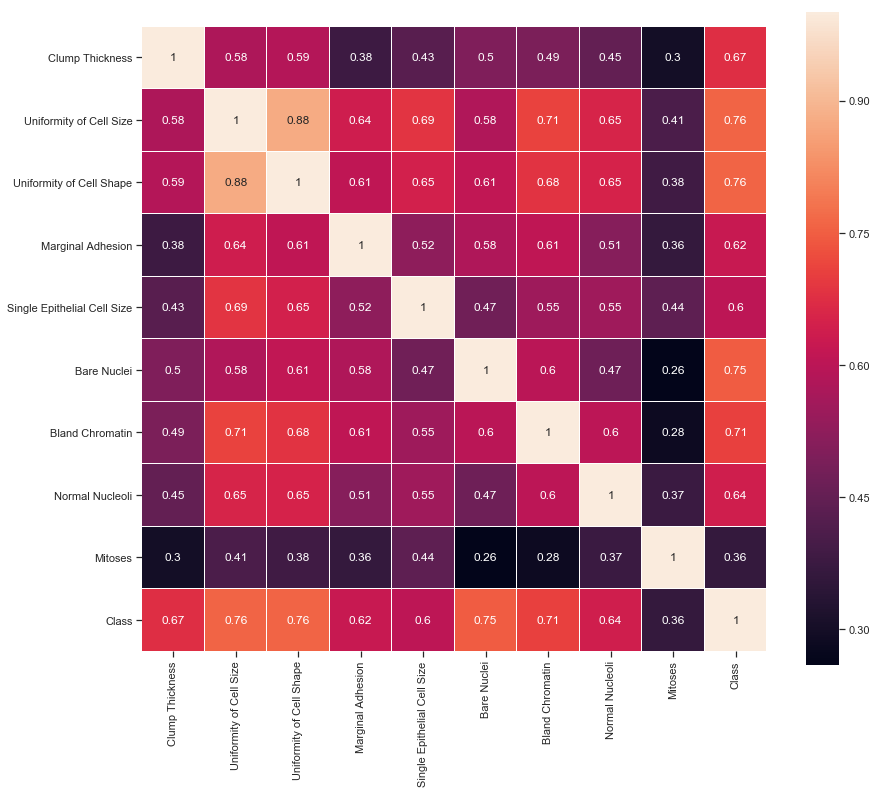

In [147]:
sns.set(style='ticks', color_codes=True)
plt.figure(figsize=(14, 12))
sns.heatmap(cancer_data.corr(), 
            linewidths=0.1, 
            square=True, 
            linecolor='white', 
            annot=True)
plt.show()

**12. Let's check for Class balance**

In [148]:
pd.crosstab(index = cancer_data['Class'], columns = 'count')

col_0,count
Class,
2.0,225
4.0,237


In [149]:
cancer_data.groupby('Class').count()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
Class,,,,,,,,,
2.0,225,225,225,225,225,225,225,225,225
4.0,237,237,237,237,237,237,237,237,237


**13. Preparing data and assigning features matrix to X and target to y**

In [117]:
X=cancer_data.iloc[:,:-1].values
y=cancer_data.iloc[:,-1].values

**14. Import scikit learn tools to split and model the data**

In [118]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [127]:
X_train

array([[ 2.,  7., 10., ...,  4.,  9.,  4.],
       [ 4.,  1.,  1., ...,  2.,  1.,  1.],
       [ 8.,  7.,  8., ...,  5., 10.,  1.],
       ...,
       [ 5.,  7.,  4., ...,  7., 10.,  3.],
       [ 6., 10., 10., ...,  7., 10.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.]])

**15. We will use random forest and we will use the variable importance from it**

In [120]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
# model=RandomForestClassifier()
model=RandomForestClassifier(n_estimators=15)# Instanciate the model

model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

**16. The accuracy of the predictions**

In [157]:
model.score(X_test,y_test)

0.967741935483871

In [151]:
feature_importances = pd.DataFrame(model.feature_importances_,
columns=['importance']).sort_values('importance',ascending=False)

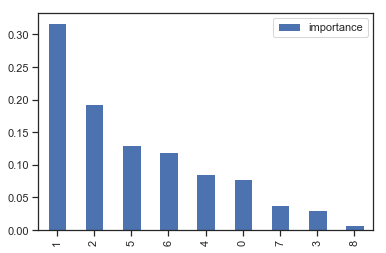

In [152]:
feature_importances.plot(kind="bar")

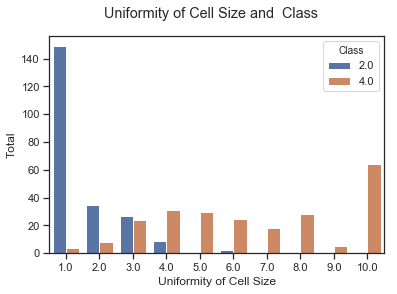

In [155]:
fig = plt.figure()
ax = sns.countplot(x='Uniformity of Cell Size', 
                   hue='Class', 
                   data=cancer_data)
ax.set(xlabel='Uniformity of Cell Size', ylabel='Total')
fig.suptitle("Uniformity of Cell Size and  Class");

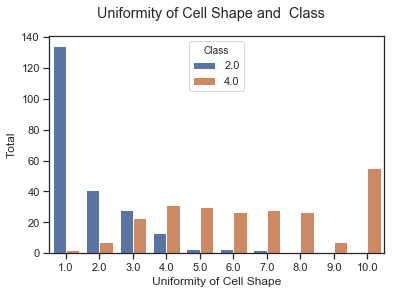

In [156]:
fig = plt.figure()
ax = sns.countplot(x='Uniformity of Cell Shape', 
                   hue='Class', 
                   data=cancer_data)
ax.set(xlabel='Uniformity of Cell Shape', ylabel='Total')
fig.suptitle("Uniformity of Cell Shape and  Class");

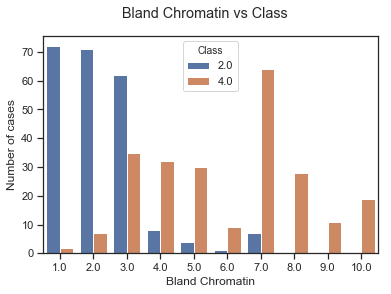

In [153]:
fig = plt.figure()
ax = sns.countplot(x='Bland Chromatin', 
                   hue='Class', 
                   data=cancer_data)
ax.set(xlabel='Bland Chromatin', ylabel='Number of cases')
fig.suptitle("Bland Chromatin and Class");


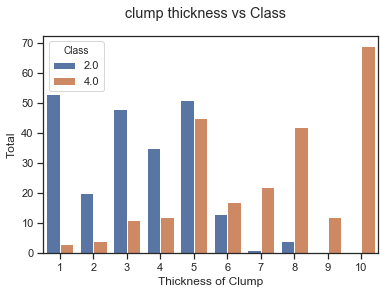

In [154]:
fig = plt.figure()
ax = sns.countplot(x='Clump Thickness', 
                   hue='Class', 
                   data=cancer_data)
ax.set(xlabel='Thickness of Clump', ylabel='Total')
fig.suptitle("clump thickness and Class");

**16. Since there is a cost associated to validating the presence of each type of feature,it make sense to check the ratio of cost by the importance rate for each feature and make a decision based on the cost rate per 1% of importance.**